In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

#### Preparing data

In [2]:
bike_sharing_data = pd.read_csv('datasets/day.csv')
bike_sharing_data.shape

(731, 16)

In [3]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
bike_sharing_data = bike_sharing_data[['season',
                                      'mnth',
                                      'holiday',
                                      'workingday',
                                      'weathersit',
                                      'temp',
                                      'cnt']]

In [5]:
bike_sharing_data.to_csv('datasets/bike_sharing_data_processed.csv', index=False)

In [6]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [7]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [8]:
bike_sharing_data['workingday'].unique()

array([0, 1], dtype=int64)

In [9]:
bike_sharing_data['holiday'].unique()

array([0, 1], dtype=int64)

In [10]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [11]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [12]:
bike_sharing_data.shape

(731, 7)

In [13]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

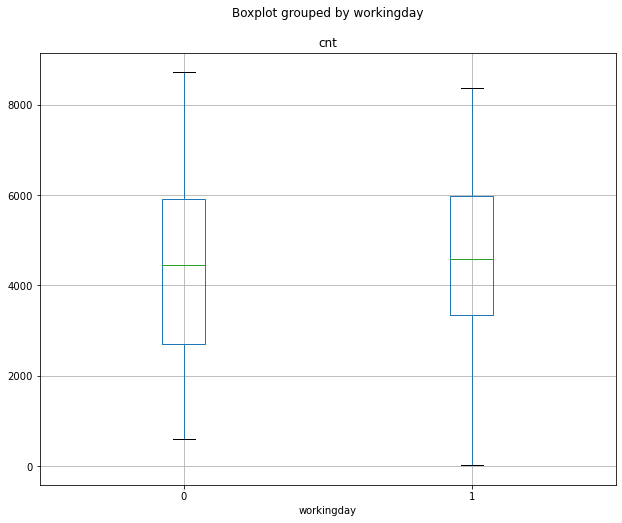

In [14]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(10, 8))

In [15]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]
sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [16]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [17]:
sample_01 = sample_01.sample(231)
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

#### Independent T-test

In [21]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

# if the pvalue is > 0.05, then we fail to reject the null hypothesis
# stating that the difference in variance is not significant

LeveneResult(statistic=1.8204873763306697, pvalue=0.17791899612360235)

(array([ 1.,  3., 10., 28., 31., 52., 47., 36., 14.,  9.]),
 array([-3.24004414, -2.67716206, -2.11427998, -1.5513979 , -0.98851582,
        -0.42563374,  0.13724834,  0.70013042,  1.26301251,  1.82589459,
         2.38877667]),
 <BarContainer object of 10 artists>)

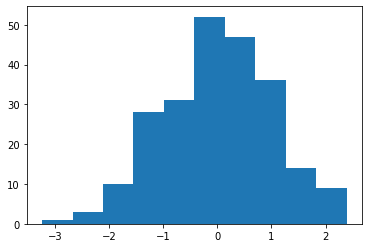

In [20]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=float))

plt.hist(diff)

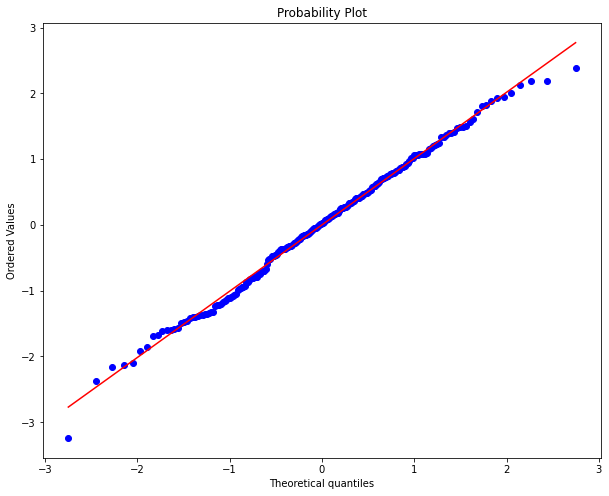

In [22]:
plt.figure(figsize=(10,8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

In [23]:
stats.shapiro(diff)

# The Shapiro-Wilk test evaluates for normaility. If the test statistic is 
# not significant, the population is normally distributed.

ShapiroResult(statistic=0.9951806664466858, pvalue=0.6818453073501587)

In [24]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

# The difference between means is not significant. 
# The workingday has no effect on number of bikes shared.

Ttest_indResult(statistic=1.4195113773419128, pvalue=0.15642727181189095)

In [25]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

C:\Users\Enlarged Squash\AppData\Roaming\Python\Python39\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [26]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4592.415584,1916.470402,126.094495,4343.967595,4840.863574
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4461.292208,1987.649554,92.473826,4279.569745,4643.014671


In [27]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   262.2468
1      Degrees of freedom =   460.0000
2                       t =     1.4195
3   Two side test p value =     0.1564
4  Difference < 0 p value =     0.9218
5  Difference > 0 p value =     0.0782
6               Cohen's d =     0.1321
7               Hedge's g =     0.1319
8           Glass's delta =     0.1368
9             Pearson's r =     0.0660


#### Performing Welch's T-test

In [28]:
bike_sharing_data.head()

# check for temperature's effect on cnt.
# temp is continuous data, so we will make categories to perform Welch's t-test.

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


<AxesSubplot:>

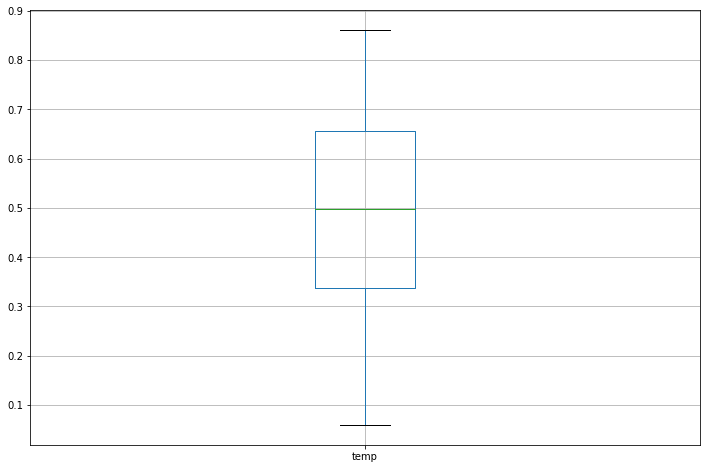

In [31]:
bike_sharing_data[['temp']].boxplot(figsize=(12, 8))

In [33]:
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [34]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
581,3,8,0,0,1,0.793333,6824,True
294,4,10,0,0,1,0.422500,4308,False
400,1,2,0,0,2,0.265833,2947,False
525,2,6,0,0,1,0.710833,7498,True
653,4,10,0,1,2,0.561667,5875,True
705,4,12,0,1,1,0.255833,5375,False
363,1,12,0,1,1,0.311667,2999,False
369,1,1,0,1,1,0.265833,3272,False
0,1,1,0,0,2,0.344167,985,False
365,1,1,0,0,1,0.370000,2294,False


In [35]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


<AxesSubplot:title={'center':'cnt'}, xlabel='temp_category'>

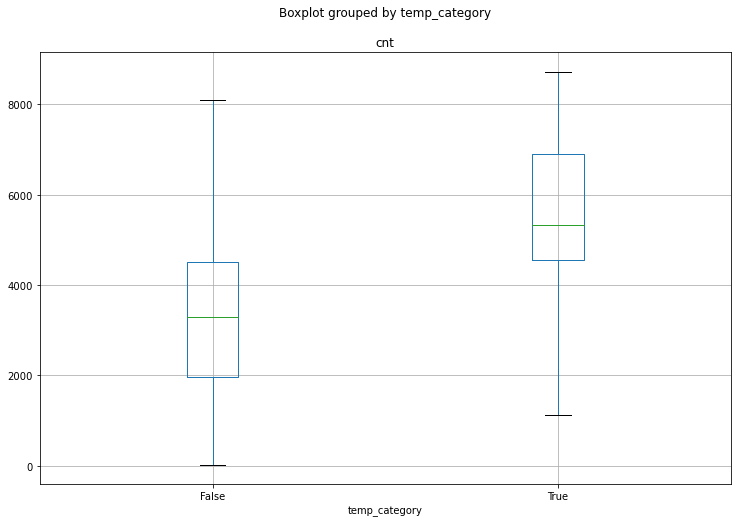

In [36]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(12, 8))

In [37]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]
sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [38]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [39]:
sample_01 = sample_01.sample(364)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [40]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=5.1754429621375735, pvalue=0.023199102764425723)

(array([ 3.,  6., 21., 38., 50., 78., 77., 54., 32.,  5.]),
 array([-3.1413608 , -2.59003083, -2.03870085, -1.48737088, -0.9360409 ,
        -0.38471093,  0.16661905,  0.71794902,  1.26927899,  1.82060897,
         2.37193894]),
 <BarContainer object of 10 artists>)

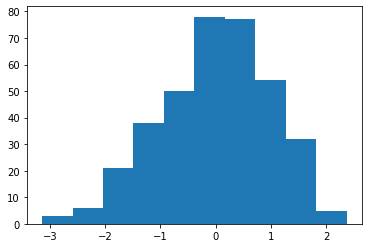

In [41]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

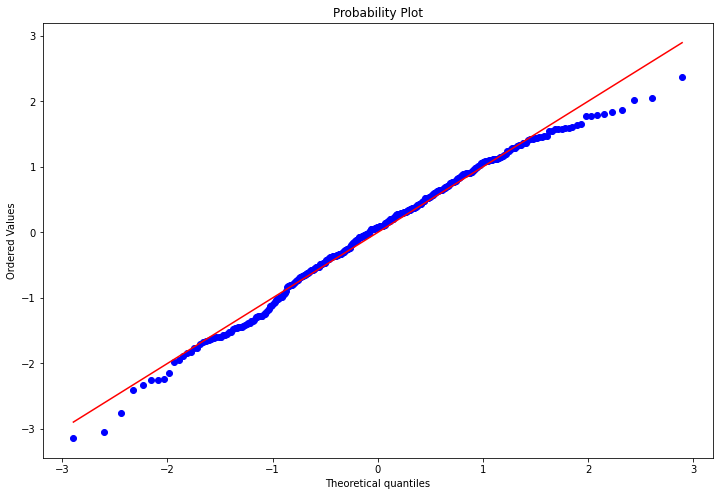

In [43]:
plt.figure(figsize=(12, 8))
stats.probplot(diff, plot=plt)
plt.show()

In [44]:
stats.shapiro(diff) 

ShapiroResult(statistic=0.9883860349655151, pvalue=0.005328136496245861)

In [45]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.79564189066247, pvalue=1.605018466221701e-64)

In [46]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

C:\Users\Enlarged Squash\AppData\Roaming\Python\Python39\site-packages\researchpy\ttest.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [47]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5596.401099,1471.724782,77.139339,5444.704997,5748.097201
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4492.032967,1931.619047,71.590565,4351.484048,4632.581886


In [48]:
print(results) 
# the temperature has a significant effect on the number of bikes rented

              Welch's t-test    results
0  Difference (cnt - cnt) =   2208.7363
1      Degrees of freedom =    714.3196
2                       t =     18.7956
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.3932
7               Hedge's g =      1.3918
8           Glass's delta =      1.5008
9             Pearson's r =      0.5752
